# Final Project Predictive Analytics

#### Author : 
2010512062 Nicodemus Naisau (demsroadmap@gmail.com) <br>
2010512062 Syauqi


<img src="https://www.mdanderson.org/images/publications/cancerwise/D/CW-diabetes-iStock-1168613048.jpg"
     alt="ecommerce img assets"
     style="float: center" />

___

# Impor Pustaka (Library)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
#model
from sklearn.neighbors import KNeighborsClassifier

#import warnings
import warnings
warnings.filterwarnings("ignore") 

# Eksplorasi Column Dataset

## Pembukaan Himpunan Data

In [29]:
df = pd.read_csv("diabetes.csv")

## Pengecekan 5 Baris Pertama Himpunan Data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Statistik Deskriptif Himpunan Data

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Kolom Pada Himpunan Data

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Terdapat sembilan (9) kolom dalam himpunan data ini, yaitu:
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome

# Info Setiap Masing-Masing Kolom

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terlihat bahwa kolom `BMI` serta kolom `DiabetesPedigreeFunction` bertipe data float, selebihnya menggunakan tipe data integer. Setiap kolom yang ada pada himpunan data `diabetes.csv` tercatat tidak memiliki data yang tidak kosong.

# Penjelasan Kolom Pada Himpunan Data

Adapun penjelasan setiap kolom yaitu:
- Pregnancies : Jumlah seseorang hamil
- Glucose : Kadar glukosa dalam darah
- BloodPressure : Pengukuran tekanan darah (mmHg)
- SkinThickness : Ketebalan kulit trisep ketika dilipat (mm)
- Insulin : Kadar insulin dalam darah
- BMI : Indeks masa tubuh (kg/m^2)
- DiabetesPedigreeFunction : Indikator riwayat diabetes dalam keluarga
- Age : Umur
- Outcome : Kelas yang menentukan apakah seseorang dikatakan terkena diabetes atau tidak

Keterangan: 
- Jika nilai kolom `Outcome`bernilai 0, maka tidak terkena diabetes
- Jika nilai kolom `Outcome`bernilai 1, maka seseorang terkena diabetes

# Data Preparation

## Pengecekan Data Yang Hilang

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Pengecekan Data Yang Duplikat

In [8]:
duplicate = df[df.duplicated()]
duplicate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


After checking dataset, does not find duplicate values.

## Pengecekan Data Yang Anomali

### Age

<AxesSubplot: xlabel='Age'>

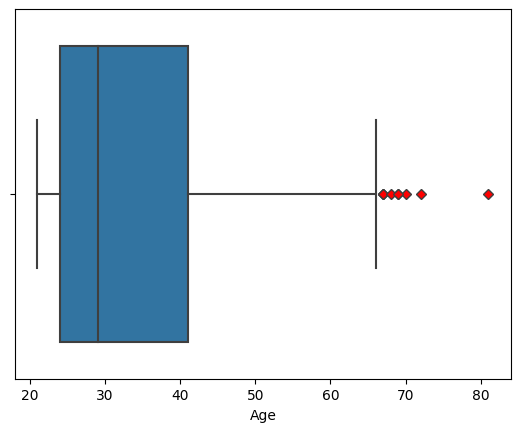

In [10]:
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(data=df, x="Age", flierprops=red_diamond)

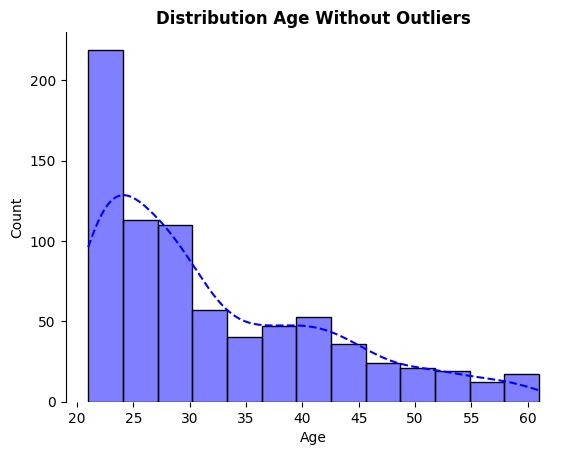

In [11]:
#quartile3 define
q3 = df["Age"].quantile(q=0.75) * 1.5
median = df["Age"].median()
#changing outliers value into median
df.loc[df["Age"] > q3, "Age"]= median

ax = sns.histplot(df["Age"], color = "blue", alpha = 0.5, kde = True, line_kws = {'color':'red','linestyle': 'dashed'})

#set_title
ax.set_title(
        "Distribution Age Without Outliers",
        fontdict={"fontweight": "bold"},
    )

#visible spine
for spine in ['top', 'right','bottom']:
    ax.spines[spine].set_visible(False)

### Pregnancies

<AxesSubplot: xlabel='Pregnancies'>

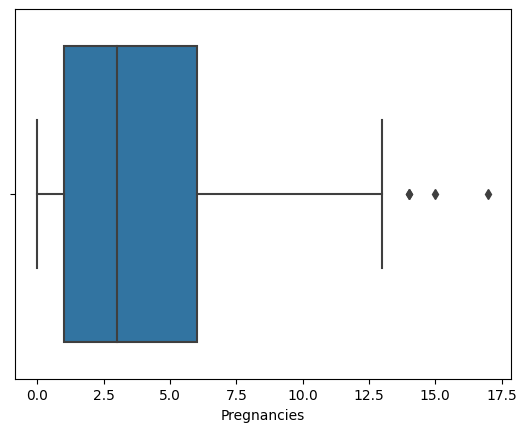

In [12]:
sns.boxplot(data=df, x="Pregnancies")

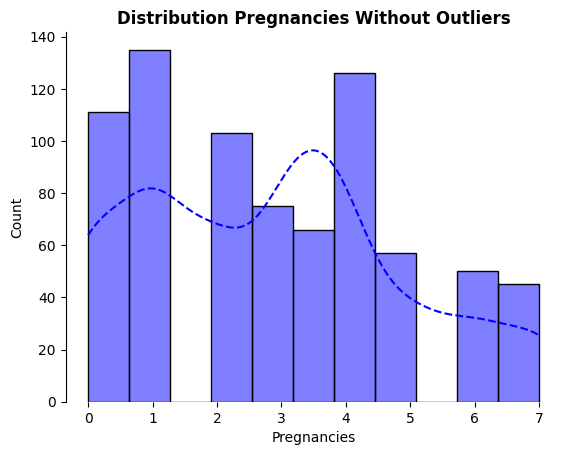

In [20]:
#quartile3 define
q3 = df["Pregnancies"].quantile(q=0.75) * 1.5
mean_pregnancies = df["Pregnancies"].mean()
#changing outliers value into median
df.loc[df["Pregnancies"] > q3, "Pregnancies"]= mean_pregnancies

ax = sns.histplot(df["Pregnancies"], color = "blue", alpha = 0.5, kde = True, line_kws = {'color':'red','linestyle': 'dashed'})

#set_title
ax.set_title(
        "Distribution Pregnancies Without Outliers",
        fontdict={"fontweight": "bold"},
    )

#visible visible
for spine in ['top', 'right','bottom']:
    ax.spines[spine].set_visible(False)

<AxesSubplot: xlabel='BloodPressure'>

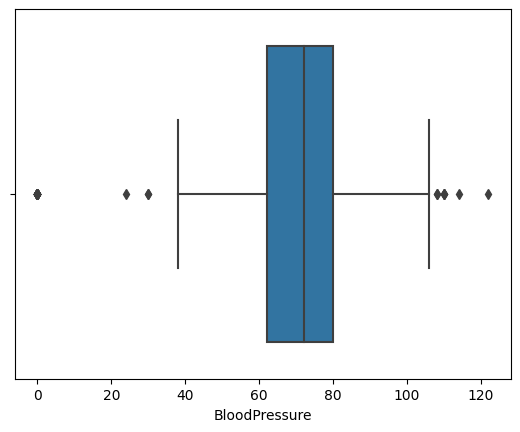

In [14]:
sns.boxplot(data=df, x="BloodPressure")

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [15]:
#adding Mapping Replace
df['Label'] = df['Outcome'].map(lambda r: {0: 'NonDiabetes', 1: 'Diabetes'}[r])

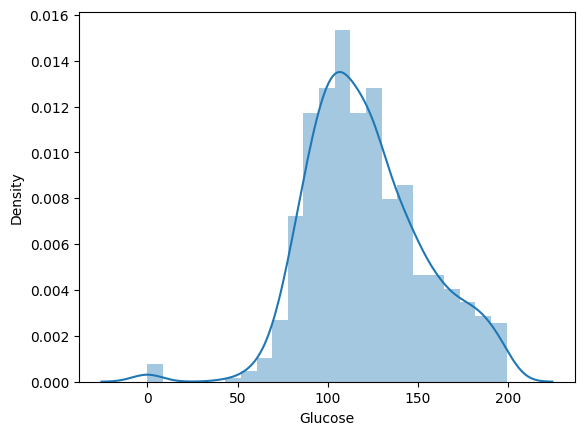

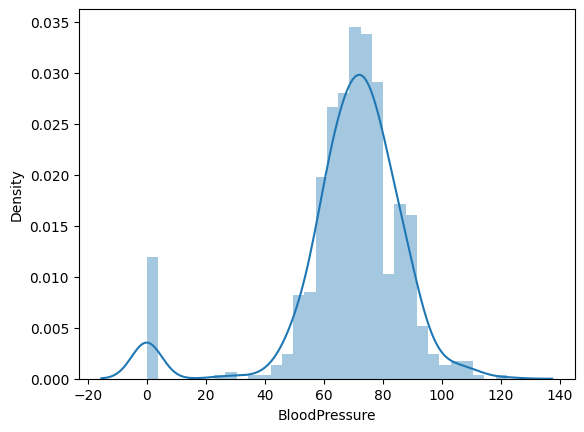

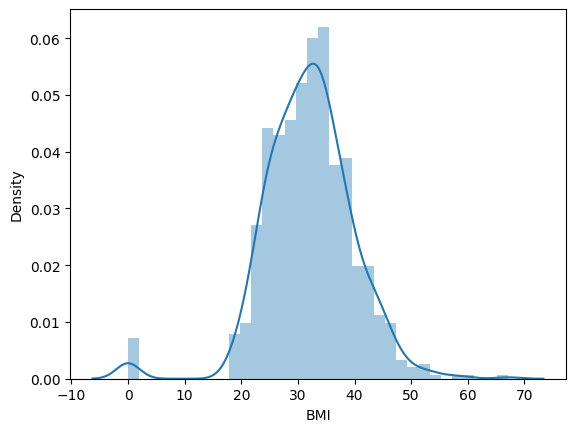

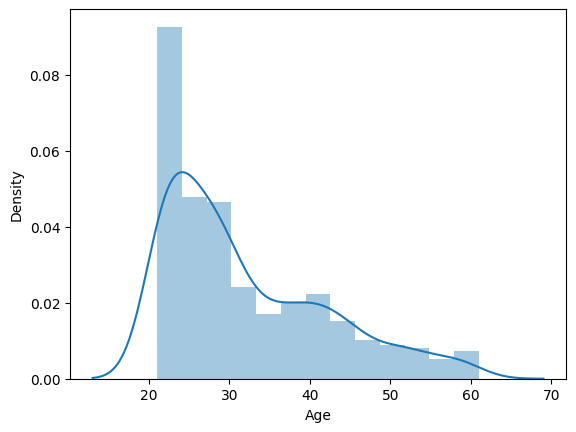

In [16]:

num_cols = ['Glucose', 'BloodPressure', 'BMI', 'Age']
for i in num_cols:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot: xlabel='Age', ylabel='Count'>

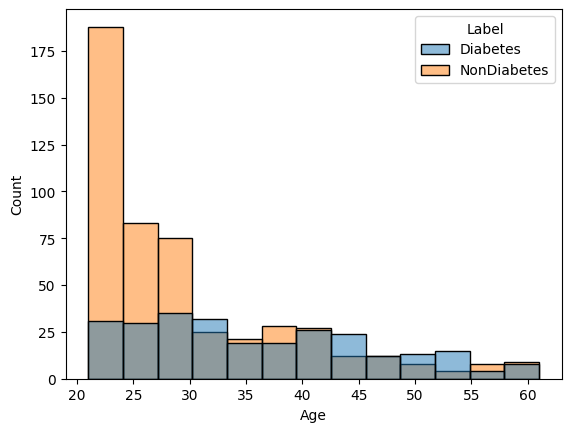

In [17]:
#Age hue outcome
sns.histplot(data=df, x="Age", hue="Label")

## Correlation Each Attribute

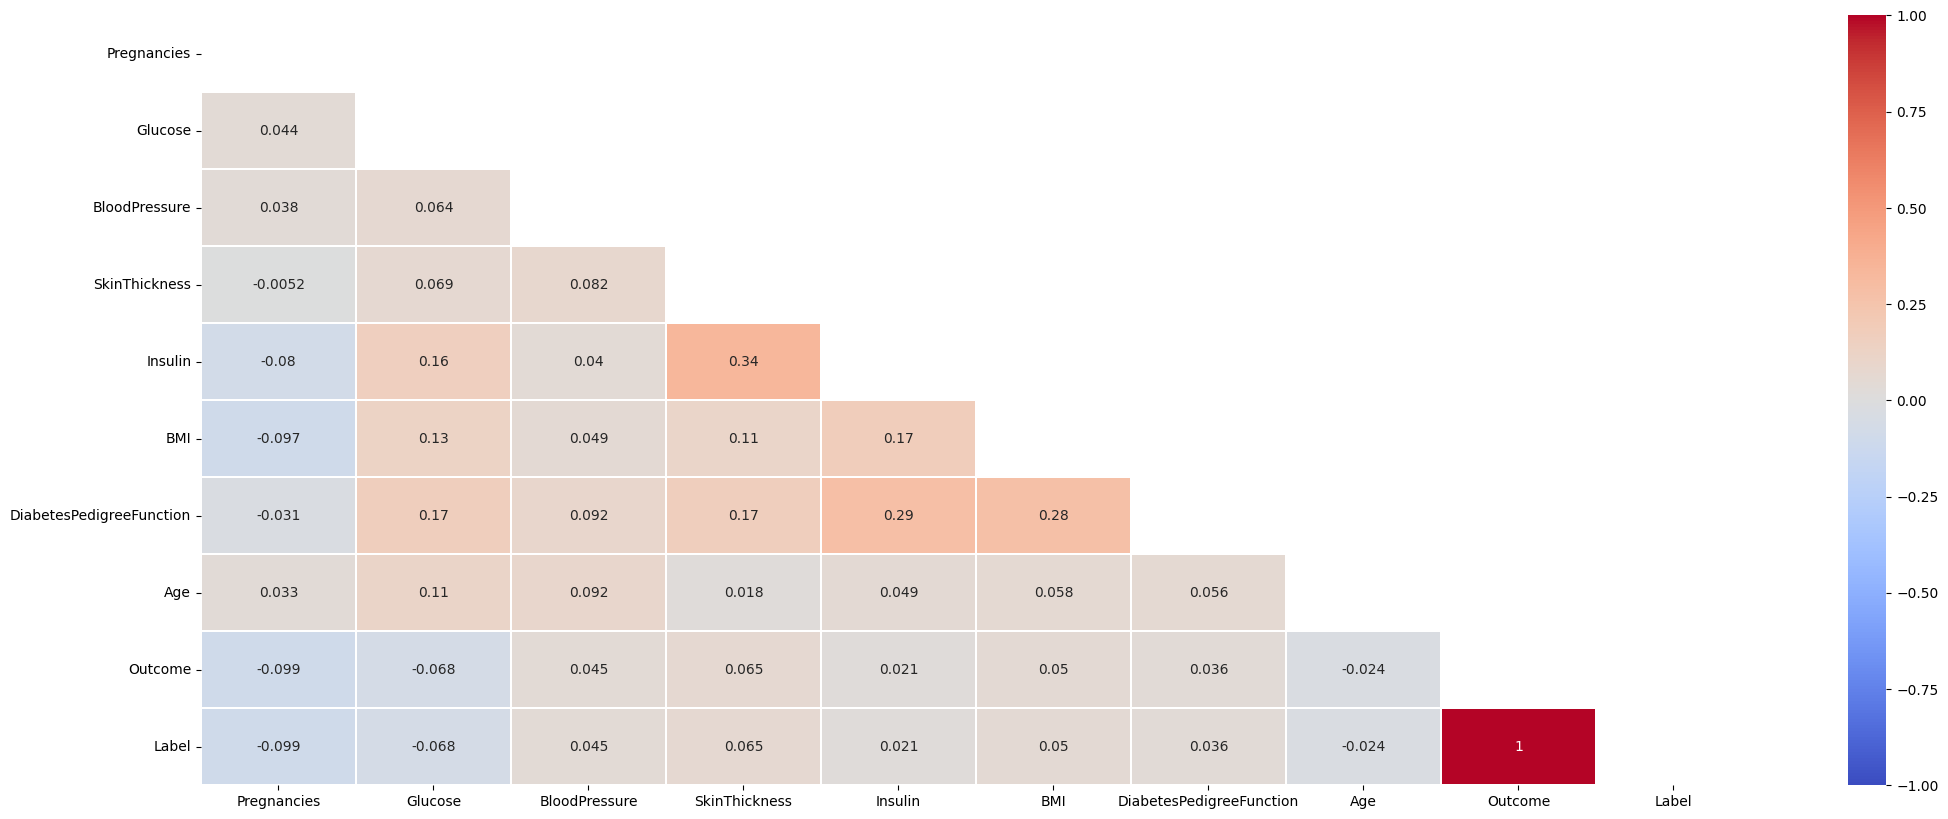

In [18]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## Proportional

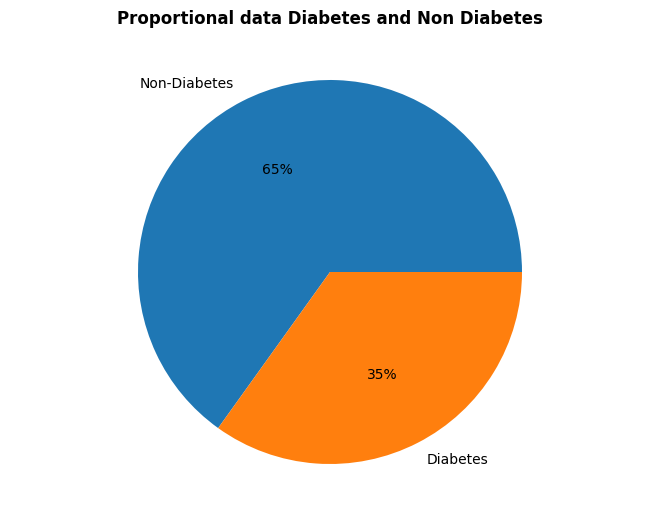

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Non-Diabetes','Diabetes']
diabetes_count = df.Outcome.value_counts()
ax.set_title(
        "Proportional data Diabetes and Non Diabetes",
        fontdict={"fontweight": "bold"},
    )
ax.pie(diabetes_count, labels=labels, autopct='%.0f%%')
plt.show()

# Data Preprocessing

## Menghapus Kolom Yang Tidak Diperlukan (Tidak Perlu)

## Encoding Data

## Spliting Himpunan Data

# Pemodelan Machine Learning